In [12]:
import torchvision
dataset = torchvision.datasets.MNIST('datasets/mnist',download=True)

In [13]:
import tqdm
transform = torchvision.transforms.Resize((32,32))
j=0
for img,i in tqdm.tqdm(dataset):
    img = transform(img)
    img.save(f'datasets/mnist/{i}_{j}.png')
    j+=1

    if j>10000:
        break

 17%|█▋        | 10000/60000 [00:08<00:43, 1159.88it/s]


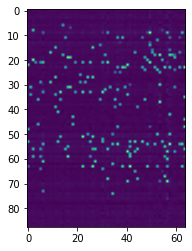

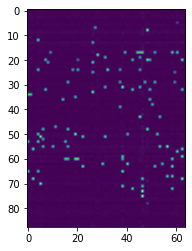

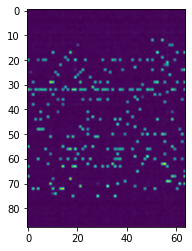

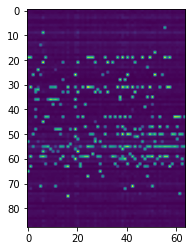

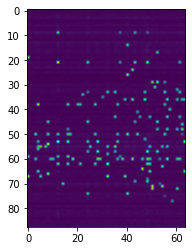

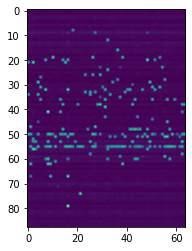

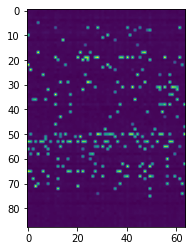

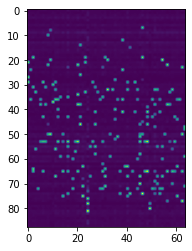

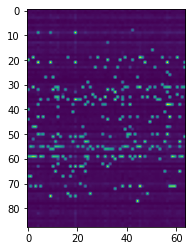

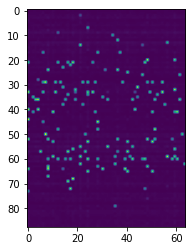

In [28]:
import numpy as np
import matplotlib.pyplot as plt
d = np.transpose(np.load('log/2bb/samples_model070000.npz')['arr_0'],(0,2,1,3))
for i in d:
    plt.figure()
    plt.imshow(i[:,:,:])

In [13]:
d.shape

(10, 64, 88, 1)

(array([5.7770e+03, 2.0946e+04, 2.0451e+04, 6.9510e+03, 1.5610e+03,
        2.2900e+02, 1.1100e+02, 5.8000e+01, 4.9000e+01, 3.7000e+01,
        2.4000e+01, 3.8000e+01, 2.4000e+01, 2.3000e+01, 1.4000e+01,
        1.4000e+01, 8.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  3. ,  15.2,  27.4,  39.6,  51.8,  64. ,  76.2,  88.4, 100.6,
        112.8, 125. , 137.2, 149.4, 161.6, 173.8, 186. , 198.2, 210.4,
        222.6, 234.8, 247. ]),
 <BarContainer object of 20 artists>)

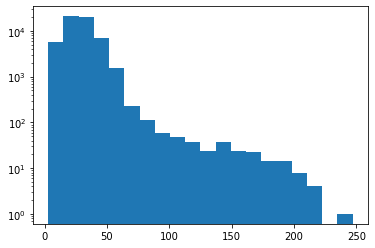

In [6]:
plt.hist(d.flatten(),bins = 20,log=True)

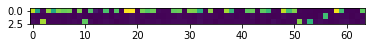

In [19]:
plt.imshow(d[2][32:35])

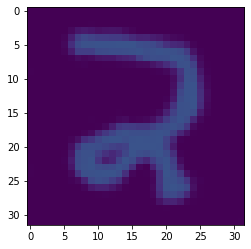

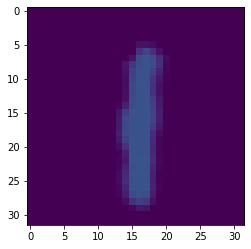

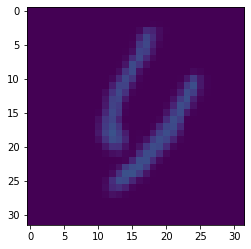

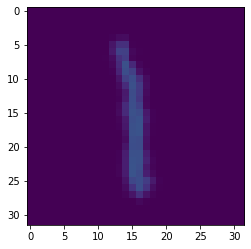

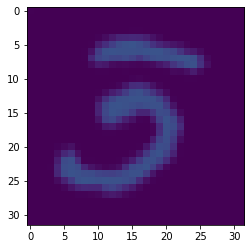

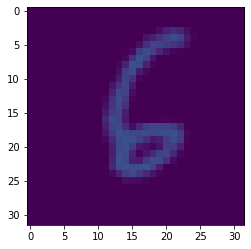

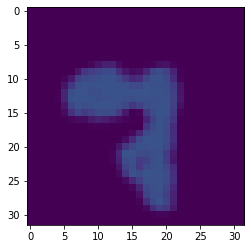

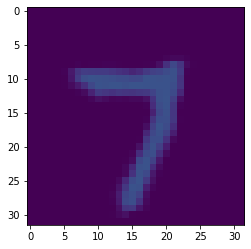

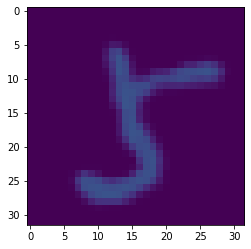

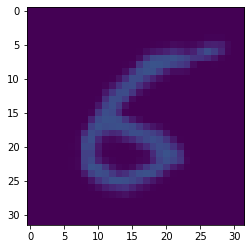

In [89]:
d.std()

96.54160938437404

In [52]:
s['arr_0'].shape


(100, 32, 3)

In [25]:
import numpy as np
import torch

In [31]:
pos = np.arange(0,4096)
pos_emb = [(pos//(2**i))%2 for i in range(11)]
pos_emb = np.stack(pos_emb)
pos_emb = torch.tensor(pos_emb).transpose(0,1)

In [32]:
pos_emb.shape

torch.Size([4096, 11])

In [33]:
t = torch.tensor([[1,2],[3,4]])

In [43]:
list(t[t > 1].cpu().numpy())

[2, 3, 4]

In [47]:
list(range(0,10,2))

[0, 2, 4, 6, 8]

In [49]:
t=torch.nn.Transformer()

In [50]:
t.encoder

TransformerEncoder(
  (layers): ModuleList(
    (0): TransformerEncoderLayer(
      (self_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
      )
      (linear1): Linear(in_features=512, out_features=2048, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (linear2): Linear(in_features=2048, out_features=512, bias=True)
      (norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (dropout2): Dropout(p=0.1, inplace=False)
    )
    (1): TransformerEncoderLayer(
      (self_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=512, out_features=512, bias=True)
      )
      (linear1): Linear(in_features=512, out_features=2048, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
      (linear2): Linear(in_features=2048, out_featu

In [25]:
from utils import plagiarism_checking
from utils.pianoroll import PianoRoll, PianoRollDataset
import numpy as np
from os import path
import os

In [2]:
data_dir = '/screamlab/home/eri24816/pianoroll_dataset/data/dataset_1/pianoroll'
ds = PianoRollDataset(data_dir,64).get_all_piano_rolls()


Creating dataset 64


In [8]:
sample_dir = 'log/2bb/samples/ema_0.9999_1800000/49.mid'
target_pr = PianoRoll.from_midi(sample_dir)
#target_pr = ds[0]
ys, scores = plagiarism_checking.sort_by_similarity(target_pr,ds,plagiarism_checking.proj_sim)

100%|██████████| 24116/24116 [00:04<00:00, 5236.28it/s]


In [9]:
for i, y in enumerate(list(reversed(ys))[:10]):
    p = sample_dir.replace('.mid','sim')+f'/{i}.mid'
    os.makedirs(path.dirname(p),exist_ok=True)
    y.to_midi(p)

In [7]:
list(reversed(ys))[0].pedal

[0, 16, 24, 32, 40, 48, 56]

In [14]:
plagiarism_checking.cosine_sim(target_pr.to_tensor(normalized=True)[:64],target_pr.to_tensor(normalized=True)[:64])

tensor(1.0000)

In [38]:
x=target_pr.to_tensor(0,64,True,normalized=True)[:64]
y=ds[0].to_tensor(0,64,True,normalized=True)[:64]

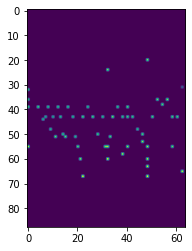

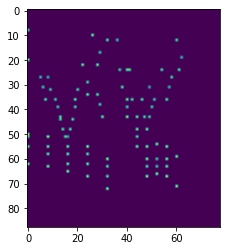

In [40]:
import matplotlib.pyplot as plt
plt.imshow(x.transpose(0,1))
plt.figure()
plt.imshow(ys[-1].to_tensor().transpose(0,1))

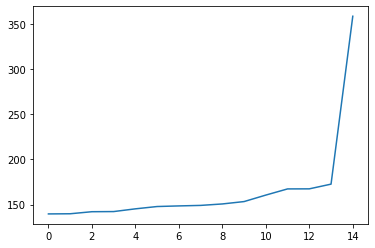

In [34]:
plt.plot(scores[-15:])

In [13]:
((x*y).sum())

tensor(5545.8350)

In [9]:
ys[-1].duration

0

In [48]:
(x.sum()*x.sum())

tensor(31029600.)

In [50]:
**2

tensor(5578.3423)

In [15]:
data_dir = '/screamlab/home/eri24816/pianoroll_dataset/data/dataset_1/pianoroll'
ds = PianoRollDataset(data_dir)

Creating dataset 0


In [19]:
ds.pianorolls[0].duration

4040

In [26]:
d = np.array([pr.duration/32 for pr in ds.pianorolls])

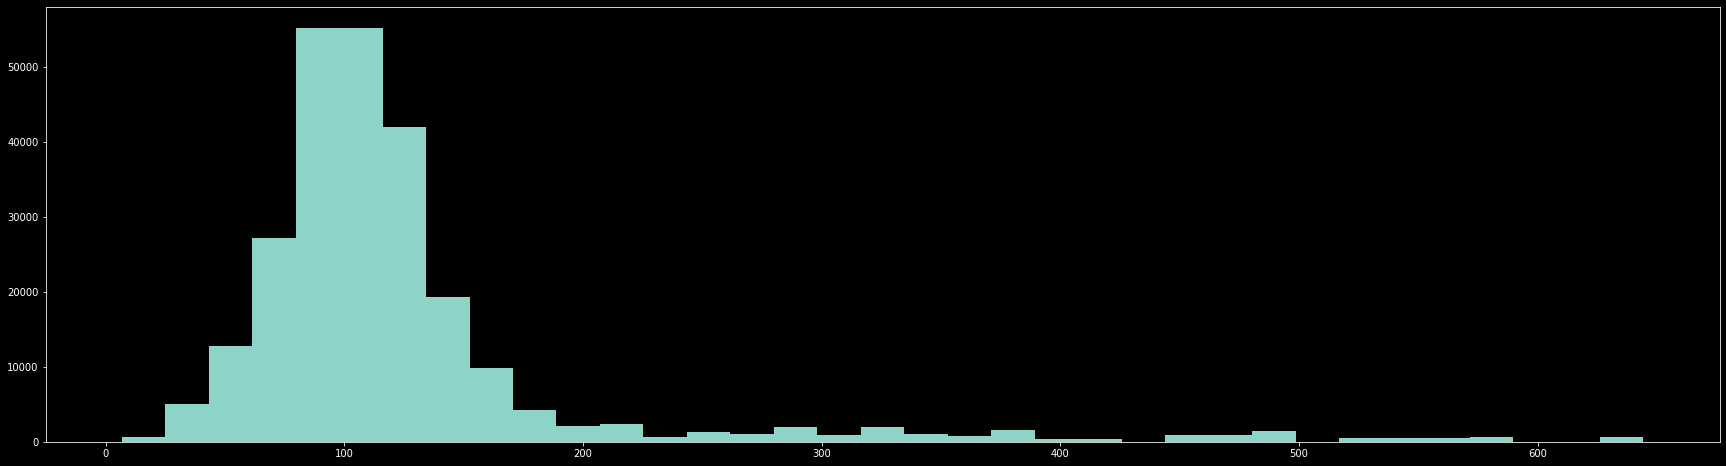

In [41]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plt.figure(figsize=(30,8))
_=plt.hist(d,35,weights=d)

In [39]:
sum(d[d<180])/sum(d)

0.9033686928084981

In [47]:
ds[0].shape

torch.Size([1600, 88])

In [49]:
200*32

6400

In [112]:
import torch
import numpy as np
def _get_sinusoid_encoding_table(n_position, d_hid):
    ''' Sinusoid position encoding table '''
    # TODO: make it with torch instead of numpy

    def get_position_angle_vec(position):
        # this part calculate the position In brackets
        return [position / np.power(10000, 2 * (hid_j // 2) / d_hid) for hid_j in range(d_hid)]

    sinusoid_table = np.array([get_position_angle_vec(pos_i) for pos_i in range(n_position)])
    # [:, 0::2] are all even subscripts, is dim_2i
    sinusoid_table[:, 0::2] = np.sin(np.pi*sinusoid_table[:, 0::2])  # dim 2i
    sinusoid_table[:, 1::2] = np.cos(np.pi*sinusoid_table[:, 1::2])  # dim 2i+1

    return torch.FloatTensor(sinusoid_table).unsqueeze(0)


In [113]:
p=_get_sinusoid_encoding_table(400,16)[0]

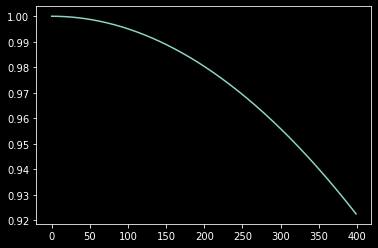

In [132]:
import matplotlib.pyplot as plt
plt.plot(p[:,15])

In [127]:
p[:10,12]

tensor([0.0000, 0.0031, 0.0063, 0.0094, 0.0126, 0.0157, 0.0188, 0.0220, 0.0251,
        0.0283])

In [94]:
pos = np.arange(0,256)
local_pos_emb = [(pos//(2**i))%2 for i in range(11)]

In [102]:
local_pos_emb[8]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [99]:
2**11

2048

In [23]:
import torch
x = torch.arange(0,3).view(1,3)

In [24]:
x

tensor([[0, 1, 2]])

In [26]:
x.expand(2,6)

RuntimeError: The expanded size of the tensor (6) must match the existing size (3) at non-singleton dimension 1.  Target sizes: [2, 6].  Tensor sizes: [1, 3]

In [18]:
32*180

5760

In [19]:
x

tensor([[[ 0,  1,  2]],

        [[ 3,  4,  5]],

        [[ 6,  7,  8]],

        [[ 9, 10, 11]]])

In [3]:
from utils.pianoroll import PianoRollDataset, PianoRoll
dataset = PianoRollDataset(
    '/home/eri24816/pianoroll',
    0,
    shard=1,
    num_shards=10,
)


In [21]:
a = dataset[0]

In [31]:
for i in range(0,257,20):
    a = dataset[i]
    a = PianoRoll.from_tensor(a,normalized=True)
    a.to_midi(f'runs_/test/{i}.mid')

257

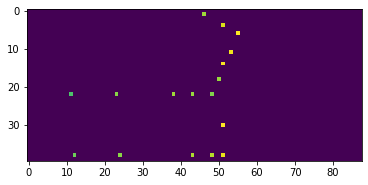

In [12]:
import matplotlib.pyplot as plt
plt.imshow(a[10:50])

In [11]:
a.shape

torch.Size([5760, 88])

In [1]:
import torch

/home/eri24816/miniconda3/envs/music/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
a = torch.nn.Linear(10,10)
b = torch.nn.Linear(10,20)

In [5]:
class m(torch.nn.Module):
    def __init__(self,a,b) -> None:
        super().__init__()
        print(self.modules)
        self.a=a
        print(self.modules)
        self.b=b
        print(self.modules)

In [7]:
m(a,b)

<bound method Module.modules of m()>
<bound method Module.modules of m(
  (a): Linear(in_features=10, out_features=10, bias=True)
)>
<bound method Module.modules of m(
  (a): Linear(in_features=10, out_features=10, bias=True)
  (b): Linear(in_features=10, out_features=20, bias=True)
)>


m(
  (a): Linear(in_features=10, out_features=10, bias=True)
  (b): Linear(in_features=10, out_features=20, bias=True)
)

In [1]:
from improved_diffusion.models.encoder import CyclicalKlWeight

/home/eri24816/miniconda3/envs/music/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
a=CyclicalKlWeight(2,100)

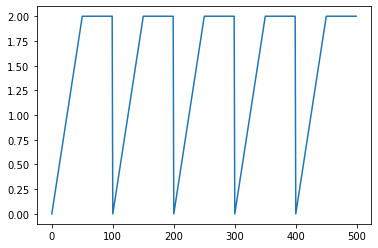

In [3]:
import matplotlib.pyplot as plt
plt.plot([a.get(i) for i in range(500)])

In [4]:
import torch
a=torch.zeros(1)
b = torch.nn.Identity(a)

In [5]:
a is b


False